# [서울 종로구 아파트 매매 타이밍 분석을 위한 데이터 수집]

*   기간: 2023-04-26 ~ 2023-05-04 (총 4일)
*   리더: 장예지
*   정의: 
          서울 종로구 아파트 매매 타이밍 분석을 위한 데이터 수집
*   목적: 아파트 매매시기 결정에 지표가 되는 데이터를 수집한다.
*   범위: 
        기간 : 2022년 01월 ~ 2023년 4월 
        지역 : 서울 종로구 (11110)
       


## [할 일 목록]

* ~~공공데이터 API 사용 승인요청~~ 
* ~~국토부 실거래가 코드를 참고하여, 원하는 지역의 코드를 확인한다.~~
* ~~매매가 및 전세가 관련 데이터 수집 (2022년 01월 ~ 2023년 4월)~~
* ~~국세청_사업자현황_100대 생활업종 관련 데이터 수집~~
* ~~부동산 매매 거래건수 데이터 수집 (2022-2023년)~~ 
* ~~수집된 데이터를 가지고 데이터프레임 만들기~~
* ~~csv로 저장~~


### [1일차]

#### 1.   **공공데이터 API 사용 승인요청.**

#### **2.   매매가 관련 데이터 수집 (2022-2023년)**

### [2일차]

#### **1.   전세가 관련 데이터 수집 (2022-2023년)**

### [3일차]

#### **1. 국세청_사업자현황_100대 생활업종 관련 데이터 수집**

### [4일차]

#### **1.   부동산 매매 거래건수 데이터 수집 (2022-2023년)**

#### **2.   수집된 최종 데이터 확인 및 데이터 관련 문서작성**

## [이슈 항목]

### 1.   ~~태그와 공백을 제외한 결과값만 출력.~~ 

```
pur_data = []

(생략)

    for item in items : 

        pur_result = [] 
        
        pur_result.append(item.find('층'))
        pur_result.append(item.find('전용면적'))
        pur_result.append(item.find('거래금액'))

        pur_data.append(pur_result)

```
(pur_data 출력결과) =>  
[<층>3</층>, <전용면적>150.48</전용면적>, <거래금액>     200,000</거래금액>] 같이 태그와 함께 결과값을 반환함
```
        pur_result.append(item.find('층').string.strip())
        pur_result.append(item.find('전용면적').string.strip())
        pur_result.append(item.find('거래금액').string.strip())

```
```.string``` 메서드를 사용해 해당 태그 안에 포함된 문자열을 반환하고  ```.strip()```메서드를 이용해 반환값이 None인 것을 양쪽 끝의 공백을 제거한 문자열을 반환하도록 만들어 이를 해결함

(pur_data 출력결과) =>  
['3', '150.48', '200,000']와 같이 태그가 제외된 데이터 값만 반환함


### 2.   ~~str으로 반환된 결과값을 int형으로.~~ 

```

col = ['날짜', '법정동', '지번', '아파트', '층', '전용면적', '거래금액', '건축년도']
pur_df = pd.DataFrame(pur_data, columns=col)
pur_df.set_index("날짜")

```
(pur_df 출력결과) =>  
```['거래금액']``` 의 데이터가 ,(콤마)로 구분되어 문자형으로 인식함.

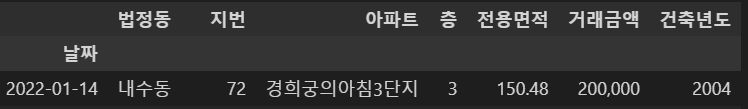


![](image/2023-05-04-02-00-57.png)


```
col = ['날짜', '법정동', '지번', '아파트', '층', '전용면적', '거래금액', '건축년도']
pur_df = pd.DataFrame(pur_data, columns=col)
pur_df['거래금액'] = pur_df['거래금액'].str.replace(',', '').astype(int)
pur_df.set_index("날짜")

```
```pur_df['거래금액']``` 의 str 객체를 ```replace``` 메서드를 사용해 ,(콤마)을 제거하고  ```.astype(int)``` 메서드로 이를 int형으로 변환하여 해결함

(pur_df 출력결과) =>  
![](image/2023-05-04-02-05-58.png)
